<a href="https://colab.research.google.com/github/ClaireWa/Python_ML-PMR_flavour/blob/master/4a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pystan
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


In [0]:
import pystan

code = """
data {
  int<lower=0> N; // Number of samples
  int<lower=0> y[N]; // The observed output data
  vector[N] x; // The observer input data
}
parameters {
  real alpha; // param of regression model for normal distr of alpha
  real beta; // param of regression model for normal distr of beta
}
transformed parameters {
  real<lower=0> lambda[N];
  for (n in 1:N) {
  lambda[n] = exp((alpha*x[n]) + beta);
  }
}

model {
  alpha ~ normal(0,10);
  beta ~ normal(0,10);
  for (n in 1:N) {
  y[n] ~ poisson(lambda[n]);
  }
}
"""

sm = pystan.StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2745cf0679c0f0d63d4e706cecf9369f NOW.


In [0]:
observed_ys = [1, 0, 2, 1, 2]
observed_xs = [-0.5051905265552104618, -0.1718571932218771470, 
               0.1614761401114561679, 0.4948094734447895382, 
               0.8150985069051909226]
results = sm.sampling(data ={"N": len(observed_ys), "y": observed_ys, 
                             "x":observed_xs}, iter=10000, chains=1)

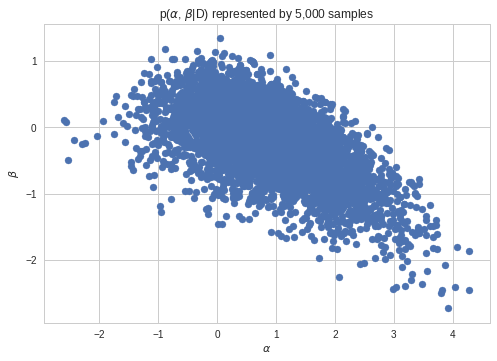

In [0]:
plt.scatter(results.extract()["alpha"], results.extract()["beta"], marker='o')
plt.title(r'p($\alpha$, $\beta$|D) represented by 5,000 samples')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

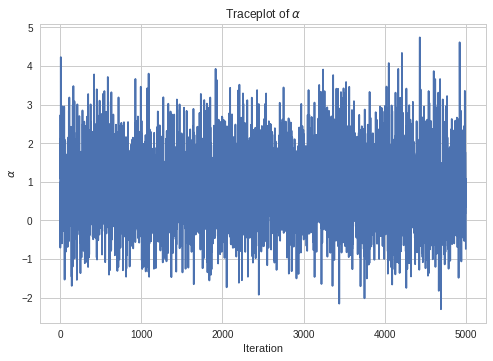

In [0]:
plt.plot(results.extract()["alpha"])
plt.title(r'Traceplot of $\alpha$')
plt.ylabel(r'$\alpha$')
plt.xlabel("Iteration")
plt.show()

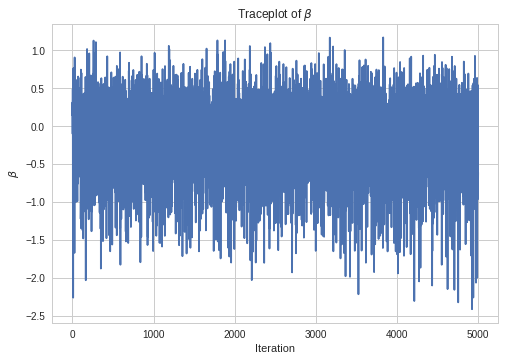

In [0]:
plt.plot(results.extract()["beta"])
plt.title(r'Traceplot of $\beta$')
plt.ylabel(r'$\beta$')
plt.xlabel("Iteration")
plt.show()

In [0]:
a_samples = results.extract()["alpha"]
b_samples = results.extract()["beta"]
theta = np.column_stack([a_samples, b_samples])
mean = np.mean(theta, axis =0)
corr= np.corrcoef(theta, rowvar=False)
print(mean)
print(corr)


[ 0.88934485 -0.21777843]
[[ 1.        -0.5990301]
 [-0.5990301  1.       ]]
